# Intrusion Detection System

Implementation of an IDS with machine learning techniques, exploiting the public dataset UNSW NB-15

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

# Dataset exploration and processing
The UNSW-NB 15 dataset was created by using different tools that generates a hybrid of realistic normal traffic activities and synthetic attack behaviors in network traffic, that are collected over four different ".csv" files.

Each instance of the dataset is described by 49 features collected in features.csv file. 
In UNSW-NB 15 there are nine categories of attack types:
- `Fuzzers`: Massive input of data
- `Analysis`: Different type of intrusions into web apps
- `Backdoor`: An unauthorized remote access
- `DoS`: Denial of service
- `Exploit`: Activities that uses bug or vulnerabilites to attack
- `Generic`: Attack to block-cipher
- `Reconnaissance`: Probing activities
- `Shellcode`: Used to exploit sw vulnerabilites
- `Worm`: A type of malware

In [2]:
# used as reference
features = pd.read_csv("UNSW-NB15\\UNSW-NB15_features.csv")
features = pd.DataFrame(features)

In [3]:
makeLowerString = lambda x: x.strip().lower()

features['Type'] = features['Type'].apply(makeLowerString)
features['Name'] = features['Name'].apply(makeLowerString)
features.drop(columns=['No.'],inplace=True)

The dataset contains several types of features: nominal, numerical and binary

In [4]:
features

,Name,Type,Description
0,srcip,nominal,Source IP address
1,sport,integer,Source port number
2,dstip,nominal,Destination IP address
3,dsport,integer,Destination port number
4,proto,nominal,Transaction protocol
5,state,nominal,Indicates to the state and its dependent proto...
6,dur,float,Record total duration
7,sbytes,integer,Source to destination transaction bytes
8,dbytes,integer,Destination to source transaction bytes
9,sttl,integer,Source to destination time to live value


In [5]:
# Concatenate the four different dataset
df1 = pd.read_csv("UNSW-NB15\\UNSW-NB15_1.csv",header=None)
df2 = pd.read_csv("UNSW-NB15\\UNSW-NB15_2.csv",header=None)
df3 = pd.read_csv("UNSW-NB15\\UNSW-NB15_3.csv",header=None)
df4 = pd.read_csv("UNSW-NB15\\UNSW-NB15_4.csv",header=None)


C:\Users\franc\anaconda3\envs\aic\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,3,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\franc\anaconda3\envs\aic\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,39,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df = pd.concat([df1,df2,df3,df4],ignore_index=True)
del df1,df2,df3,df4

In [7]:
# Here the complete dataset
df.columns = features.Name
df.shape

(2540044, 49)

In [8]:
df.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload',
       'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'label'],
      dtype='object', name='Name')

## Data exploration

Some considerations: two features, namely stime and ltime, refer to the start record time and last record time. Due to the presence of dur attibute that represent the total duration that is obtained from the difference of ltime and stime, we can consider stime and ltime as redundant, so we can drop it.

Since some features are specific to the computing infrastructure such as source IP address, source port number, destination IP address and destination port number, they do not possess relevant information for intrusion detection purpose

AGGIUNTA: 
Given that the source IP address, source port number, destination IP address, and destination port number are characteristic that are specific to the laboratory environment used in the generation of the dataset, ther are not relevant in the implementation of the IDS.

In [9]:
# Drop srcip, sport, dstip, dsport, stime, ltime in the reference csv
features_to_drop = [0,1,2,3,28,29]

# Retrieving indexies of different types in dataset
nominal_idx = features[features.Type=="nominal"].index.tolist()
binary_idx = features[features.Type=="binary"].index.tolist()
integer_idx = features[features.Type=="integer"].index.tolist()
float_idx = features[features.Type=="float"].index.tolist()
features.drop(features_to_drop,inplace=True)
features.reset_index(drop=True,inplace=True)

In [10]:
df.iloc[0]

Name
srcip                  59.166.0.0
sport                        1390
dstip               149.171.126.6
dsport                         53
proto                         udp
state                         CON
dur                      0.001055
sbytes                        132
dbytes                        164
sttl                           31
dttl                           29
sloss                           0
dloss                           0
service                       dns
sload                 500473.9375
dload                 621800.9375
spkts                           2
dpkts                           2
swin                            0
dwin                            0
stcpb                           0
dtcpb                           0
smeansz                        66
dmeansz                        82
trans_depth                     0
res_bdy_len                     0
sjit                          0.0
djit                          0.0
stime                  1421927414
ltime    

In [11]:
df.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [12]:
df.attack_cat.value_counts()

Generic             215481
Exploits             44525
 Fuzzers             19195
DoS                  16353
 Reconnaissance      12228
 Fuzzers              5051
Analysis              2677
Backdoor              1795
Reconnaissance        1759
 Shellcode            1288
Backdoors              534
Shellcode              223
Worms                  174
Name: attack_cat, dtype: int64

By executing the above commands, it can be noticed that dataset is quite dirty.
For example the attack catogory "backdoor" appears twice as "backdoor" and "backdoors".
Also a "normal" category is missing, that refers to the genuine traffic. From the literature it is described that 2218761 instances refers to normal traffic.

In [13]:
df.attack_cat.isnull().sum()

2218761

All **null** values in **attack_cat** feature correspond to the missing category **normal**, as a consequence of the above consideration.

In [14]:
# Since "normal" label is missing, let's associate normal to NaN values
df.attack_cat = df.attack_cat.fillna(value="normal")

# Adjust labels in attack cat
df['attack_cat'] = df['attack_cat'].apply(makeLowerString)
df.attack_cat.value_counts()

normal            2218761
generic            215481
exploits            44525
fuzzers             24246
dos                 16353
reconnaissance      13987
analysis             2677
backdoor             1795
shellcode            1511
backdoors             534
worms                 174
Name: attack_cat, dtype: int64

In [15]:
df['attack_cat'].replace("backdoors", "backdoor", inplace=True)
df.attack_cat.value_counts()

normal            2218761
generic            215481
exploits            44525
fuzzers             24246
dos                 16353
reconnaissance      13987
analysis             2677
backdoor             2329
shellcode            1511
worms                 174
Name: attack_cat, dtype: int64

In [16]:
# Let's check consistency of the nominal columns proto, state and service
df.proto.unique() # no noise detected
# In state and service we have 'no' and '-' used when no state or service are detected, as explained in the features file.
df.state.unique(), df.service.unique() 

(array(['CON', 'INT', 'FIN', 'URH', 'REQ', 'ECO', 'RST', 'CLO', 'TXD',
        'URN', 'no', 'ACC', 'PAR', 'MAS', 'TST', 'ECR'], dtype=object),
 array(['dns', '-', 'http', 'smtp', 'ftp-data', 'ftp', 'ssh', 'pop3',
        'snmp', 'ssl', 'irc', 'radius', 'dhcp'], dtype=object))

In [17]:
pd.set_option('display.max_colwidth', None)
features[features.Name=='state']

,Name,Type,Description
1,state,nominal,"Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state)"


In [18]:
features[features.Name=='service']

,Name,Type,Description
9,service,nominal,"http, ftp, smtp, ssh, dns, ftp-data ,irc and (-) if not much used service"


In [19]:
df["state"].replace('no','none',inplace=True)
df["service"].replace('-','none',inplace=True)
df.state = df.state.apply(makeLowerString)
df.service = df.service.apply(makeLowerString)

From the initial descriptive statistics, data needs to be normalized because attribute like source bytes are very high respect to the others

In [20]:
df.describe()

Name,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,...,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label
count,2.540044e+06,2.540044e+06,2.540044e+06,2.540044e+06,2.540044e+06,2.540044e+06,2.540044e+06,2.540044e+06,2.540044e+06,2.540044e+06,...,1.191900e+06,1.110166e+06,2.540044e+06,2.540044e+06,2.540044e+06,2.540044e+06,2.540044e+06,2.540044e+06,2.540044e+06,2.540044e+06
mean,6.587688e-01,4.339605e+03,3.642764e+04,6.278203e+01,3.076685e+01,5.163927e+00,1.632946e+01,3.695644e+07,2.450864e+06,3.328888e+01,...,2.345860e-01,3.969947e-02,9.206988e+00,8.988957e+00,6.439099e+00,6.900983e+00,4.642133e+00,3.592722e+00,6.845883e+00,1.264872e-01
std,1.392489e+01,5.640603e+04,1.610961e+05,7.462279e+01,4.285090e+01,2.251709e+01,5.659478e+01,1.186044e+08,4.224865e+06,7.628392e+01,...,7.940930e-01,1.996591e-01,1.083676e+01,1.082249e+01,8.162029e+00,8.205058e+00,8.477574e+00,6.174434e+00,1.125828e+01,3.323977e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.037000e-03,2.000000e+02,1.780000e+02,3.100000e+01,2.900000e+01,0.000000e+00,0.000000e+00,1.353973e+05,1.191612e+04,2.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,1.586100e-02,1.470000e+03,1.820000e+03,3.100000e+01,2.900000e+01,3.000000e+00,4.000000e+00,5.893038e+05,5.893252e+05,1.200000e+01,...,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
75%,2.145507e-01,3.182000e+03,1.489400e+04,3.100000e+01,2.900000e+01,7.000000e+00,1.400000e+01,2.039923e+06,2.925990e+06,4.400000e+01,...,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01,6.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00
max,8.786638e+03,1.435577e+07,1.465753e+07,2.550000e+02,2.540000e+02,5.319000e+03,5.507000e+03,5.988000e+09,1.287619e+08,1.064600e+04,...,3.600000e+01,4.000000e+00,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.000000e+01,6.700000e+01,1.000000e+00


In [21]:
# Check for null values in columns
df.columns[df.isnull().any()].tolist()

['ct_flw_http_mthd', 'is_ftp_login']

In [22]:
features[features.Name=='ct_flw_http_mthd']

,Name,Type,Description
31,ct_flw_http_mthd,integer,No. of flows that has methods such as Get and Post in http service.


In [23]:
features[features.Name=='is_ftp_login']

,Name,Type,Description
32,is_ftp_login,binary,If the ftp session is accessed by user and password then 1 else 0.


In [24]:
df[df.ct_flw_http_mthd.isna()].service.value_counts()

none        595228
dns         588155
ftp-data     64115
smtp         42800
ftp          24229
ssh          23799
http          8044
pop3          1327
dhcp           165
ssl            122
snmp            99
radius          33
irc             28
Name: service, dtype: int64

In [25]:
df[df.is_ftp_login.isna()].service.value_counts()

none        596013
dns         588155
http        111955
ftp-data     64115
smtp         42800
ssh          23799
pop3          1327
ftp           1267
dhcp           165
ssl            122
snmp            99
radius          33
irc             28
Name: service, dtype: int64

The dataset contains two features that contain null values:
- **ct_flw_http_mthd**: this is a feature related to the HTTP flow. It can be noticed from the above execution that most of the null values refer to non-http flows.
- **is_ftp_login**: this is a feature related to the FTP flow. Same consideration as the previous feature.

Let's analyze the distribution of binary features

In [26]:
binary_cols = df.columns[binary_idx]
df[binary_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Name,,,,,,,,
is_sm_ips_ports,2540044.0,0.001651,0.040596,0.0,0.0,0.0,0.0,1.0
is_ftp_login,1110166.0,0.039699,0.199659,0.0,0.0,0.0,0.0,4.0
label,2540044.0,0.126487,0.332398,0.0,0.0,0.0,0.0,1.0


The **is_ftp_login** variable should be a binary variable, but its values lies in range [0,4].

In [27]:
# Checking consistency of features.csv categorical columns with dataframe columns
df_objcet_cols = df.columns[df.dtypes=="object"]
nominal_cols = df.columns[nominal_idx]
np.array_equal(df_objcet_cols,nominal_cols) # false
print(df_objcet_cols,nominal_cols)

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service',
       'ct_ftp_cmd', 'attack_cat'],
      dtype='object', name='Name') Index(['srcip', 'dstip', 'proto', 'state', 'service', 'attack_cat'], dtype='object', name='Name')


In [28]:
features[features.Name=='ct_ftp_cmd']

,Name,Type,Description
33,ct_ftp_cmd,integer,No of flows that has a command in ftp session.


By analyzing the feature file, the attribute **ct_ftp_cmd** should be integer, instead it seems to be a nominal variable.

In [29]:
df.ct_ftp_cmd.unique()

array([0, 1, 6, 2, 4, 8, 5, 3, '0', '1', ' ', '2', '4'], dtype=object)

<AxesSubplot:>

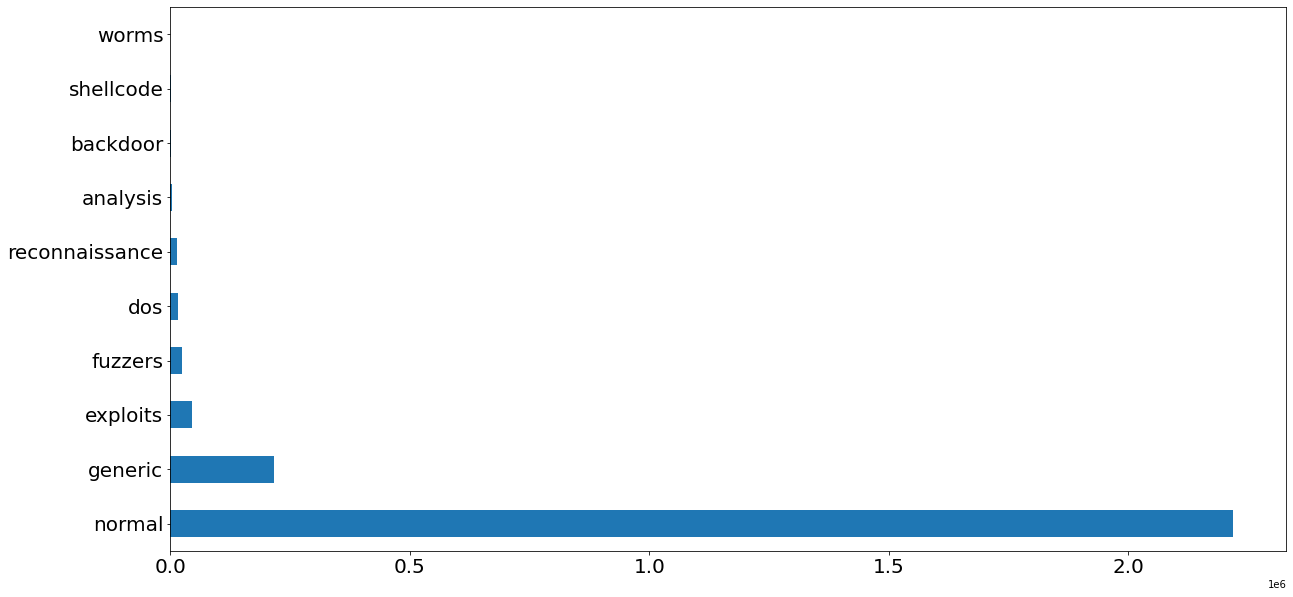

In [30]:
attack_cat_counts = df.attack_cat.value_counts()
attack_cat_counts.plot(kind='barh', figsize=(20,10), fontsize=20)

<AxesSubplot:>

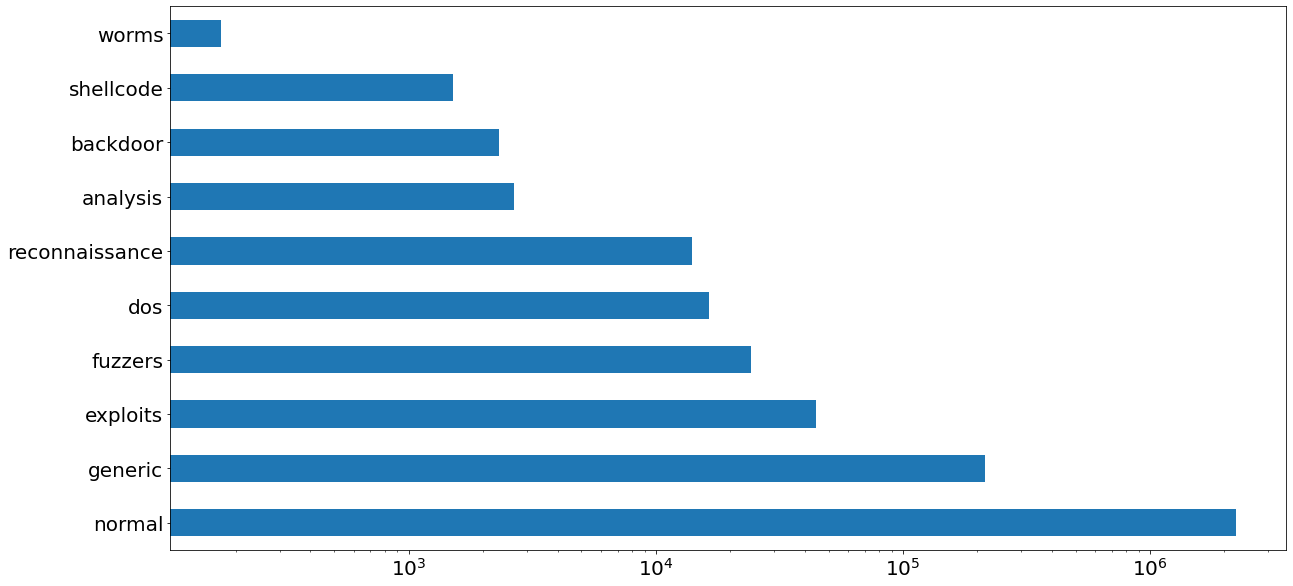

In [31]:
attack_cat_counts = df.attack_cat.value_counts()
attack_cat_counts.plot(kind='barh',logx = True, figsize=(20,10), fontsize=20)

<AxesSubplot:>

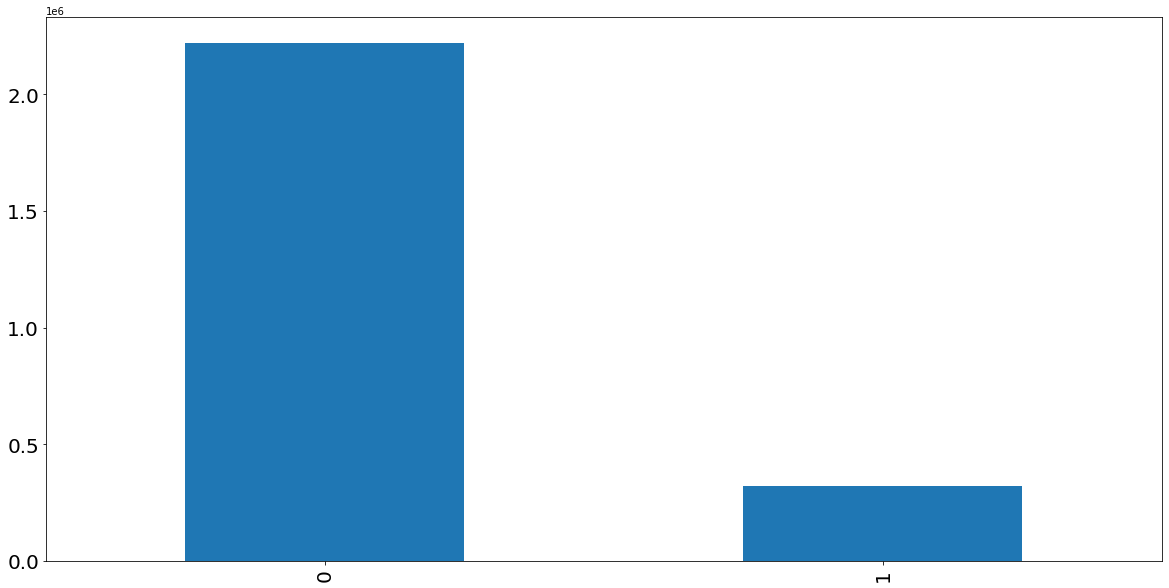

In [32]:
attack_label_counts = df.label.value_counts()
attack_label_counts.plot(kind='bar', figsize=(20,10), fontsize=20)

As we can see from the above plots, dataset is too umbalanced, with a prevalence of normal traffic respect to malicious one.
The most frequent attack categories are:
- Generic
- Exploit
- Fuzzers
- Dos
- Reconnaissance

We need to consider such unbalancing when performing classification

Short recap and steps to perform:
- Remove the information of Source/Destination IP and Port, start time and last time, according to the literature
- Dataset contains NaN values for two variables and they needs to be filled
- There is a binary variable (_is_ftp_login_) that has non binary values
- There is a nominal variable (_ct_ftp_cmd_) that should be numerical
- Numerical data needs to be normalized
- The _proto_, _state_ and _service_ columns are categorical features,  but ML models can't process text data it can process numbers. So we have to convert categorical columns to numerical columns.
- The dataset is very unbalanced, so in order to get the most reliable results as possible, it will be necessary to rebalance it.

## ML Problem

_Binary classification:_<br>
The dataset contains "label" with 0 and 1 where 0 represents normal traffic and 1 represent attack. So with the features available we will try to predict a given datapoint whether it belongs to attack or non-attack category.

_Multiclass classification:_<br>
The dataset contains "attack_cat" with 9 values that represent different type of malicious traffic and 1 that represents benign traffic. So with the features available we will try to predict which category the datapoint belongs.

Classification task will be performed using k-fold cross-validation, so a **sklearn Pipeline** is defined to both preprocess and classify data. Due to the fact that the dataset is unmabalanced, it is used also the **Imbalanced-learn Pipeline** that natively provides tools to deal with unbalancing

In [33]:
from matplotlib.pyplot import subplots

def clean_set(X):
    X = X.drop(columns=['srcip', 'sport', 'dstip', 'dsport','stime','ltime'])

    # Replacing the NaN values with 0 where the flow do not refer to HTTP service
    mask = (X.service != 'http') & (X.ct_flw_http_mthd.isna())
    X.loc[mask,'ct_flw_http_mthd'] = 0

    # Setting the NaN values with 0 where the flow do not refer to FTP service
    mask = (X.service != 'ftp') & (X.is_ftp_login.isna())
    X.loc[mask,'is_ftp_login'] = 0
    # Adjust the binary variable by replacing 4 and 2 with the 
    # most probable value in the dataset that is 0
    X['is_ftp_login'].replace(4,0,inplace=True)
    X['is_ftp_login'].replace(2,0,inplace=True)

    # Replacing with 0 the instances that do not refer to FTP service 
    mask = X.service != 'ftp'
    X.loc[mask,'ct_ftp_cmd'] = 0
    # This is to convert the variable to numerical
    mask = (X.ct_ftp_cmd==' ')
    X.loc[mask,'ct_ftp_cmd'] = -1
    X.ct_ftp_cmd = X.ct_ftp_cmd.astype(int)
    X.loc[mask,'ct_ftp_cmd'] = np.nan
    return X

def fit_mean_values(X,y):
    mean_http_flw = {}
    mean_ftp_cmd = {}
    mean_is_ftp_login = {}
    df = pd.concat([X,y],axis=1)
    # comuputing the mean value for sample belonging to the same class
    for value in df.attack_cat.unique():
        mask = df['attack_cat'] == value
        mean_http_flw[value] = round(np.mean(df[mask].ct_flw_http_mthd))
        mean_ftp_cmd[value] = round(np.mean(df[mask].ct_ftp_cmd))
        mean_is_ftp_login[value] = round(np.mean(df[mask].is_ftp_login))
    return mean_http_flw,mean_ftp_cmd,mean_is_ftp_login

def apply_mean_values(X,y,mean_http_flw,mean_ftp_cmd,mean_is_ftp_login):
    df = pd.concat([X,y],axis=1)
    for value in df.attack_cat.unique():
        mask1 = (df['attack_cat'] == value) & (df.ct_flw_http_mthd.isna())
        mask2 = (df['attack_cat'] == value) & (df.ct_ftp_cmd.isna())
        mask3 = (df['attack_cat'] == value) & (df.is_ftp_login.isna())
        df.loc[mask1,'ct_flw_http_mthd'] = mean_http_flw[value]
        df.loc[mask2,'ct_ftp_cmd'] = mean_ftp_cmd[value]
        df.loc[mask3,'is_ftp_login'] = mean_is_ftp_login[value]
    return df.drop(columns=['attack_cat']) # the modified X

def balancing_60_40(label):
    undersampled_dict = {}
    attack_count = np.count_nonzero(label!='normal')
    for elem in np.unique(label):
        if elem=='normal':
            undersampled_dict['normal'] = int((attack_count*60)/40)
        else:
            undersampled_dict[elem] = np.count_nonzero(label==elem)
    return undersampled_dict

def print_classification_report(score_array,accuracy_array,confusion,confusion_classes,k_fold):
    metrics = ['type','precision','recall','f-score','support']
    avg_score = np.mean(score_array,axis=0)
    report_elem = []
    for elem,i in zip(confusion_classes,range(len(confusion_classes))):
        precision = avg_score[0][i]
        recall = avg_score[1][i]
        fscore = avg_score[2][i]
        suppport = avg_score[3][i]
        report_elem.append([elem,precision,recall,fscore,suppport])
    avg_classification_report = pd.DataFrame(report_elem,columns=metrics)
    avg_accuracy = np.mean(accuracy_array,axis=0)
    print("The classification report for {} folds is:".format(k_fold))
    print(avg_classification_report)
    print("The average accuracy is:")
    print(avg_accuracy)
    
    cfm = ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels=confusion_classes)
    fig, ax = plt.subplots(figsize=(12, 12))
    cfm.plot(ax=ax)

In [34]:
#attack = ['attack',"precision_atck","recall_atck","fscore_atck","suppport_atck"]
#benign = ['benign',"precision_norm","recall_norm","fscore_norm","suppport_norm"]
#a = []
#a.append(attack)
#a.append(benign)
#a

In [35]:
nominal_idx = features[features.Type=="nominal"].index.tolist()
binary_idx = features[features.Type=="binary"].index.tolist()
integer_idx = features[features.Type=="integer"].index.tolist()
float_idx = features[features.Type=="float"].index.tolist()

In [36]:
from sklearn.base import TransformerMixin, BaseEstimator
class Debug(BaseEstimator, TransformerMixin):

    def __init__(self, n):
        # called at initialization of the pipeline
        self.step = n

    def transform(self, X):
        return X

    def fit(self, X, y=None, **fit_params):
        if self.step == 1:
            if isinstance(X, np.ndarray):
                X = pd.DataFrame(X)
            print(X.shape)
            print(X.columns)
            print(len(X.proto.unique()))
            print(len(X.state.unique()))
            print(len(X.service.unique()))
        elif self.step==2:
            if isinstance(X, np.ndarray):
                X = pd.DataFrame(X)
            print("Shape")
            print(X.shape)
            print(X.columns)
        else:
            print("Shape")
            print(X.shape)
        return self

class CustomOneHotEncoder(BaseEstimator, TransformerMixin):

    def __init__(self, columns):
        # called at initialization of the pipeline
        self.ohe = OneHotEncoder(sparse=False,handle_unknown="ignore")
        self.columns = columns

    def transform(self, X):
        """ Return the new object here"""
        #Perform standard OHE
        X.reset_index(drop=True,inplace=True)
        X_clean = X.drop(columns=self.columns)
        X_drop = X[self.columns]
        ohe_transform = self.ohe.transform(X_drop)
        self.ohe.get_feature_names_out()
        #save feature names of the OHE dataframe
        data_OHE = pd.DataFrame(columns=self.ohe.get_feature_names_out(),data = ohe_transform)
        X = pd.concat([X_clean,data_OHE],axis=1)
        return X

    def fit(self, X, y=None, **fit_params):
        X_drop = X[self.columns]
        self.ohe.fit(X_drop)
        return self

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def apply_cross_validation(df_data, target_label, folds,clf):
    skf = StratifiedKFold(n_splits=folds) # maintains class distribution in the split

    score_array = []
    accuracy_array = []
    labels_len = len(target_label.unique())
    confusion = np.zeros(shape=(labels_len,labels_len))

    for enu,(train_index, test_index) in enumerate(skf.split(df_data, target_label)):
        print()
        print(f'-------------------------------------------fold {enu}')
        #print("TRAIN:",train_index.shape)
        #print("TEST:", test_index.shape)
        
        # Applying preprocessing
        X_train, X_test = df_data.iloc[train_index], df_data.iloc[test_index]
        y_train, y_test = target_label.iloc[train_index], target_label.iloc[test_index]
        #X_train.reset_index(drop=True,inplace=True)
        #X_test.reset_index(drop=True,inplace=True)
        #y_train.reset_index(drop=True,inplace=True)
        #y_test.reset_index(drop=True,inplace=True)

        X_train = clean_set(X_train)
        X_test = clean_set(X_test)
        mean_http_flw,mean_ftp_cmd,mean_is_ftp_login = fit_mean_values(X_train,y_train)
        X_train = apply_mean_values(X_train,y_train,mean_http_flw,mean_ftp_cmd,mean_is_ftp_login)
        X_test = apply_mean_values(X_test,y_test,mean_http_flw,mean_ftp_cmd,mean_is_ftp_login)
        
        X_train = pd.concat([X_train,y_train],axis=1)
        X_train.drop_duplicates(keep='first',inplace=True)
        y_train = X_train['attack_cat']
        X_train.drop(columns=['attack_cat'],inplace=True)
        X_train.reset_index(drop=True,inplace=True)
        X_test.reset_index(drop=True,inplace=True)
        y_train.reset_index(drop=True,inplace=True)
        y_test.reset_index(drop=True,inplace=True)
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        accuracy_array.append(accuracy_score(y_pred,y_test))
        confusion += confusion_matrix(y_test,y_pred, labels=clf.classes_)
        score_array.append(precision_recall_fscore_support(y_test, y_pred, average=None,labels=clf.classes_,beta=2))

    print_classification_report(score_array,accuracy_array,confusion,clf.classes_,folds)

In [38]:
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbalancedPipe
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB

df_data = df.drop(columns=['attack_cat','label'])

target_category = df['attack_cat']
target_label_bin = df['attack_cat'].apply(lambda x: 0 if x == 'normal' else 1)
target_label = df['attack_cat'].apply(lambda x: 'attack' if x != 'normal' else 'normal')

folds = 5

random = RandomUnderSampler(sampling_strategy=balancing_60_40,random_state=42)
smt = SMOTE(random_state=42)

numerical_cols = features.loc[integer_idx+float_idx,'Name'].tolist()
std_scaler = ImbalancedPipe(steps=[('scaler', StandardScaler())])

categorical_features = ['proto','state','service']
categorical_transformer = OneHotEncoder(sparse=False,handle_unknown='ignore')

one_hot_encoding = ColumnTransformer(
    transformers=[('ohencoded', categorical_transformer,categorical_features)],remainder='passthrough')

standardizer = ColumnTransformer(
    transformers=[
        ('standardizer', std_scaler, numerical_cols)],remainder='passthrough')

# Multi Class Classification

## Naive Bayes Classifier

In [ ]:
unbalanced_pipe_nb = ImbalancedPipe(steps=[
    ('ohe', CustomOneHotEncoder(categorical_features)),
    ('standardizer',standardizer),
    ('classifier',  GaussianNB())])

undersampled_pipe_nb = ImbalancedPipe(steps=[
    ('ohe', CustomOneHotEncoder(categorical_features)),
    ('undersampler', random),
    ('standardizer',standardizer),
    ('classifier',  GaussianNB())])

balanced_pipe_nb = ImbalancedPipe(steps=[
    ('ohe', CustomOneHotEncoder(categorical_features)),
    ('undersampler', random),
    ('smote', smt),
    ('standardizer',standardizer),
    ('classifier', GaussianNB())])

print("Naive Bayes with unbalanced training set")
apply_cross_validation(df_data,target_category,folds,unbalanced_pipe_nb)
print("Naive Bayes with 60/40 balancing training set")
apply_cross_validation(df_data,target_category,folds,undersampled_pipe_nb)
print("Naive Bayes with balanced training set")
apply_cross_validation(df_data,target_category,folds,balanced_pipe_nb)
print(f'')

## Decision Tree Classifier

In [ ]:
#for i in [3,5,7]:
#print("Number of leaf: " ,i)
unbalanced_pipe_dt = ImbalancedPipe(steps=[
    ('ohe', CustomOneHotEncoder(categorical_features)),
    ('standardizer',standardizer),
    ('classifier',  DecisionTreeClassifier(min_samples_leaf=7))])

undersampled_pipe_dt = ImbalancedPipe(steps=[
    ('ohe', CustomOneHotEncoder(categorical_features)),
    ('undersampler', random),
    ('standardizer',standardizer),
    ('classifier',  DecisionTreeClassifier(min_samples_leaf=7))])

balanced_pipe_dt = ImbalancedPipe(steps=[
    ('ohe', CustomOneHotEncoder(categorical_features)),
    ('undersampler', random),
    ('smote', smt),
    ('standardizer',standardizer),
    ('classifier', DecisionTreeClassifier(min_samples_leaf=7))])

print("Decision Tree with unbalanced training set")
apply_cross_validation(df_data,target_category,folds,unbalanced_pipe_dt)
print("Decision Tree with 60/40 balancing training set")
apply_cross_validation(df_data,target_category,folds,undersampled_pipe_dt)
print("Decision Tree with balanced training set")
apply_cross_validation(df_data,target_category,folds,balanced_pipe_dt)
print(f'')

## Random Forest Classifier

In [ ]:
unbalanced_pipe_rf = ImbalancedPipe(steps=[
    ('ohe', CustomOneHotEncoder(categorical_features)),
    ('standardizer',standardizer),
    ('classifier',  RandomForestClassifier(n_estimators=20,n_jobs=-1,class_weight='balanced'))])

undersampled_pipe_rf = ImbalancedPipe(steps=[
    ('ohe', CustomOneHotEncoder(categorical_features)),
    ('undersampler', random),
    ('standardizer',standardizer),
    ('classifier',  RandomForestClassifier(n_estimators=20,n_jobs=-1))])

balanced_pipe_rf = ImbalancedPipe(steps=[
    ('ohe', CustomOneHotEncoder(categorical_features)),
    ('undersampler', random),
    ('smote', smt),
    ('standardizer',standardizer),
    ('classifier', RandomForestClassifier(n_estimators=20,n_jobs=-1))])

print("Random Forest with unbalanced training set")
apply_cross_validation(df_data,target_category,folds,unbalanced_pipe_rf)
print("Random Forest with 60/40 balancing training set")
apply_cross_validation(df_data,target_category,folds,undersampled_pipe_rf)
print("Random Forest with balanced training set")
apply_cross_validation(df_data,target_category,folds,balanced_pipe_rf)
print(f'')

# Binary Classification

## Naive Bayes Classifier

In [ ]:
print("Naive Bayes with unbalanced training set")
apply_cross_validation(df_data,target_label,folds,unbalanced_pipe_nb)
print("Naive Bayes with 60/40 balancing training set")
apply_cross_validation(df_data,target_label,folds,undersampled_pipe_nb)
print("Naive Bayes with balanced training set")
apply_cross_validation(df_data,target_label,folds,balanced_pipe_nb)
print(f'')

## Decision Tree Classifier

In [ ]:
print("Decision Tree with unbalanced training set")
apply_cross_validation(df_data,target_label,folds,unbalanced_pipe_dt)
print("Decision Tree with 60/40 balancing training set")
apply_cross_validation(df_data,target_label,folds,undersampled_pipe_dt)
print("Decision Tree with balanced training set")
apply_cross_validation(df_data,target_label,folds,balanced_pipe_dt)
print(f'')

## Random Forest Classifier

In [ ]:
print("Random Forest with unbalanced training set")
apply_cross_validation(df_data,target_label,folds,unbalanced_pipe_rf)
print("Random Forest with 60/40 balancing training set")
apply_cross_validation(df_data,target_label,folds,undersampled_pipe_rf)
print("Random Forest with balanced training set")
apply_cross_validation(df_data,target_label,folds,balanced_pipe_rf)
print(f'')

In [ ]:
from sklearn.decomposition import PCA

def plot_pca(X,Y):
    # Use PCA to reduce dimensionality so we can visualize the dataset on a 2d plot
    pca = PCA(n_components=2)

    data_pca = pca.fit_transform(X)

    print(f'percentage of variance explained by principal components: {pca.explained_variance_ratio_}')
    print(f'sum: {sum(pca.explained_variance_ratio_)}')

    plt.figure(figsize=(15,10))
    colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple']
    
    for color, cat in zip(colors, np.unique(Y)):
        plt.scatter(data_pca[Y==cat, 0], data_pca[Y==cat, 1],
                    color=color, alpha=.8, lw=2, label=cat)
    plt.legend(loc='best', shadow=False, scatterpoints=1)

    plt.show()